In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

time: 340 µs (started: 2022-08-17 02:09:42 +00:00)


number of end_epoch: 2999


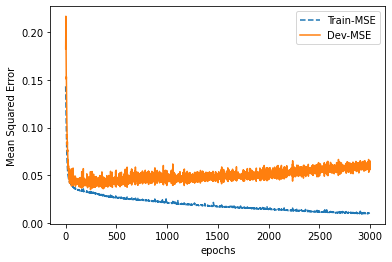

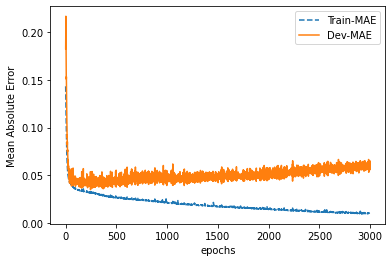

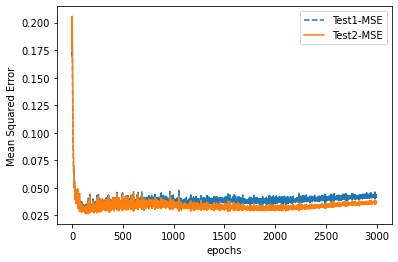

< OPT. SCORE_TOTAL EPOCH  246 > : -2.5242977968499503
opt. DEV MSE :  0.035191785544157
opt. TEST1 MSE :  0.0292289536446332
opt. TEST2 MSE :  0.027236271649599
time: 232 ms (started: 2022-08-17 02:17:03 +00:00)


In [17]:
ELBOW = 0

scores = pd.read_csv("./results/20220816/tw50_20082017_LSTM_evaluation.csv")
mse_columns = ['TRAIN_MSE','DEV_MSE']
mae_columns = ['TRAIN_MAE','DEV_MAE']
test_columns = ['TEST1_MSE', 'TEST2_MSE']

#print(scores)

end_epoch = scores.shape[0]
print(f"number of end_epoch: {end_epoch}")
plt.plot(scores[mse_columns[0]][:end_epoch],'--', label="Train-MSE")
plt.plot(scores[mse_columns[1]][:end_epoch], label="Dev-MSE")
plt.legend()
plt.xlabel('epochs')
plt.ylabel('Mean Squared Error')
plt.show()
plt.close()
plt.plot(scores[mae_columns[0]][:end_epoch],'--', label="Train-MAE")
plt.plot(scores[mae_columns[1]][:end_epoch], label="Dev-MAE")
plt.legend()
plt.xlabel('epochs')
plt.ylabel('Mean Absolute Error')
plt.show()
plt.close()
plt.plot(scores[test_columns[0]][:end_epoch],'--', label="Test1-MSE")
plt.plot(scores[test_columns[1]][:end_epoch], label="Test2-MSE")
plt.legend()
plt.xlabel('epochs')
plt.ylabel('Mean Squared Error')
plt.show()
plt.close()



mse_columns = ['TRAIN_MSE','DEV_MSE']
score_diff = (scores[mse_columns[1]]-scores[mse_columns[0]])[ELBOW:]
score_sum = (scores[mse_columns[1]]+scores[mse_columns[0]])[ELBOW:]
# score_diff = (scores['DEV_MSE'] - scores['TRAIN_MSE'])
# score_sum = (scores['DEV_MSE'] + scores['TRAIN_MSE'])

score_diff_norm = (score_diff - np.mean(score_diff))/np.std(score_diff)
score_sum_norm = (score_sum - np.mean(score_sum))/np.std(score_sum)
score_total = score_diff_norm + score_sum_norm
idx = np.argmin(score_total)
print('< OPT. SCORE_TOTAL EPOCH ',str(idx+1),'> : '+str(score_total[idx]))
print('opt. DEV MSE : ',str(scores[mse_columns[1]][idx]))
print('opt. TEST1 MSE : ',str(scores[test_columns[0]][idx]))
print('opt. TEST2 MSE : ',str(scores[test_columns[1]][idx]))

#### 